# Example Using Jacobi, Gauss-Seidel, and SOR
## From Tony Saad's uCFD course at the University of Utah
### <a>tonysaad.net</a>

For this example, consider the homogeneous diffusion equation:

$$\nabla^2u = 0$$

on a unit square, with an inlet quantity of 1 through the center of the left wall, and $u=0$ on all other walls.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

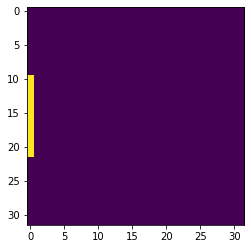

In [3]:
n = 32
l = 1.
h = l/(n-1)
u0 = np.zeros((n, n))
tol = 1e-3

# Inlet on left wall
u0[10:n-10, 0] = 1.
plt.imshow(u0)

In [13]:
# Jacobi
u = u0.copy()
unew = u0.copy()
err = 1e4
it = 1
#Using vectorized Numpy operations
start = time.time()
# while err > tol:
#     # loop over interior points only -- no boundaries
#     unew[1:-1,1:-1] = 0.25*(u[2:,1:-1]+u[:-2,1:-1]+u[1:-1,2:]+u[1:-1,:-2])
#     # compute residual (L2 norm)
#     err = np.linalg.norm(unew - u, 2)
#     u = unew.copy()
#     it += 1
    
#Using for loops
while err > tol:
    for i in range(1, n-1):
        for j in range(1, n-1):
            unew[j,i] = 0.25*(u[j+1,i]+u[j-1,i]+u[j,i+1]+u[j,i-1])
    err = np.linalg.norm(unew - u, 2)
    u = unew.copy()
    it += 1
finish = time.time()
print(f'Final err: {err}, number of iterations: {it}, total time: {finish-start:.2f} sec')

Final err: 0.0009963175201735976, number of iterations: 569, total time: 0.75 sec


In [14]:
# Gauss-Seidel
u = u0.copy()
err = 1e4
it = 1
# Can't use vectorized operations this time because I need the previous iteration's values
start = time.time()
while err > tol:
    uold = u.copy()
    for i in range(1,n-1):
        for j in range(1,n-1):
            u[j,i] = 0.25*(u[j+1,i]+u[j-1,i]+u[j,i+1]+u[j,i-1])
    err = np.linalg.norm(uold-u, 2)
    it += 1
finish = time.time()
print(f'Final err: {err}, number of iterations: {it}, total time: {finish-start:.2f} sec')

Final err: 0.000994883255014529, number of iterations: 346, total time: 0.45 sec


So far, we can see that the fastest overall operation is vectorized Jacobi. However, Jacobi is not always guaranteed to converge. Gauss-Seidel is not as fast as vectorized Jacobi, but it is faster than using the for loops with Jacobi because it converges sooner.

In [15]:
# SOR
u = u0.copy()
err = 1e4
it = 1
β = 1.8
# Can't use vectorized operations this time because I need the previous iteration's values
start = time.time()
while err > tol:
    uold = u.copy()
    for i in range(1,n-1):
        for j in range(1,n-1):
            u[j,i] = 0.25*β*(u[j+1,i]+u[j-1,i]+u[j,i+1]+u[j,i-1]) + (1-β)*u[j,i]
    err = np.linalg.norm(uold-u, 2)
    it += 1
finish = time.time()
print(f'Final err: {err}, number of iterations: {it}, total time: {finish-start:.2f} sec')

Final err: 0.0009270402520025895, number of iterations: 48, total time: 0.09 sec


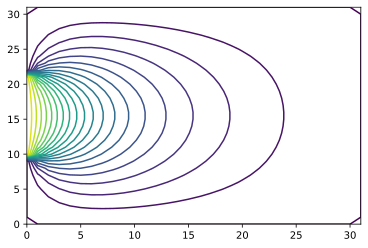

In [18]:
%config InlineBackend.figure_format = 'svg'
plt.contour(u, levels=20)

The successive overrelaxation method is approaching the speed of the vectorized Jacobi operation because the rate of convergence is so much faster. We could, of course, optimize this slightly more by performing a loop to search for the best value of $\beta$.

In [4]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get('https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css')
    return HTML(styles.text)
css_styling()